In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load datasets
purchase_df = pd.read_csv("purchase_behaviour.csv")
transaction_df = pd.read_csv("transaction_data.csv")
# Merge datasets
merged_df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR")
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [3]:
# Data validation
print(merged_df.info())
print(merged_df.describe())
print(merged_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB
None
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.0

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69691
Name: count, dtype: int64 


LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='LIFESTAGE'>

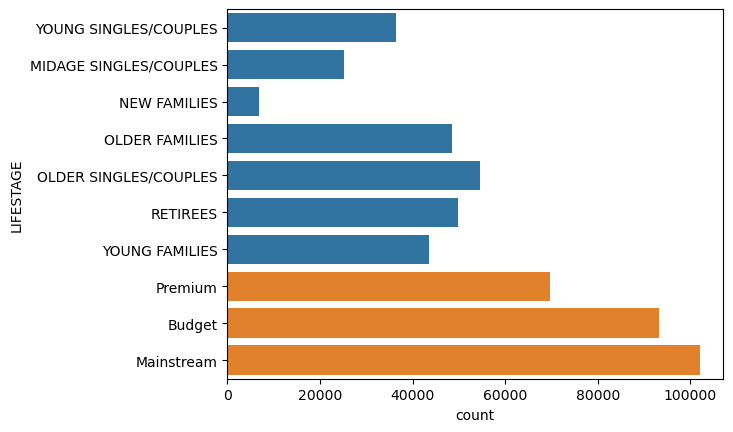

In [4]:
print(merged_df["PREMIUM_CUSTOMER"].value_counts().T,"\n\n")
print(merged_df["LIFESTAGE"].value_counts())

<Axes: xlabel='count', ylabel='LIFESTAGE'>

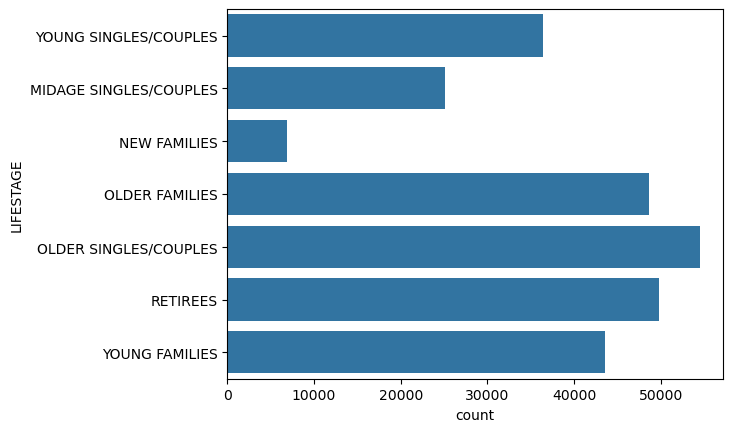

In [5]:
sns.countplot(merged_df["LIFESTAGE"])

<Axes: xlabel='count', ylabel='PREMIUM_CUSTOMER'>

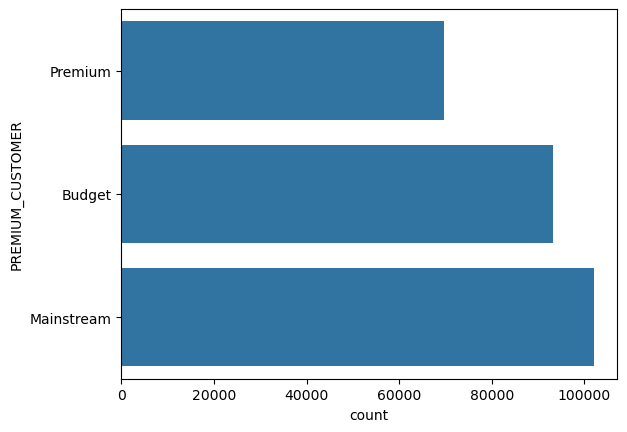

In [6]:
sns.countplot(merged_df["PREMIUM_CUSTOMER"])

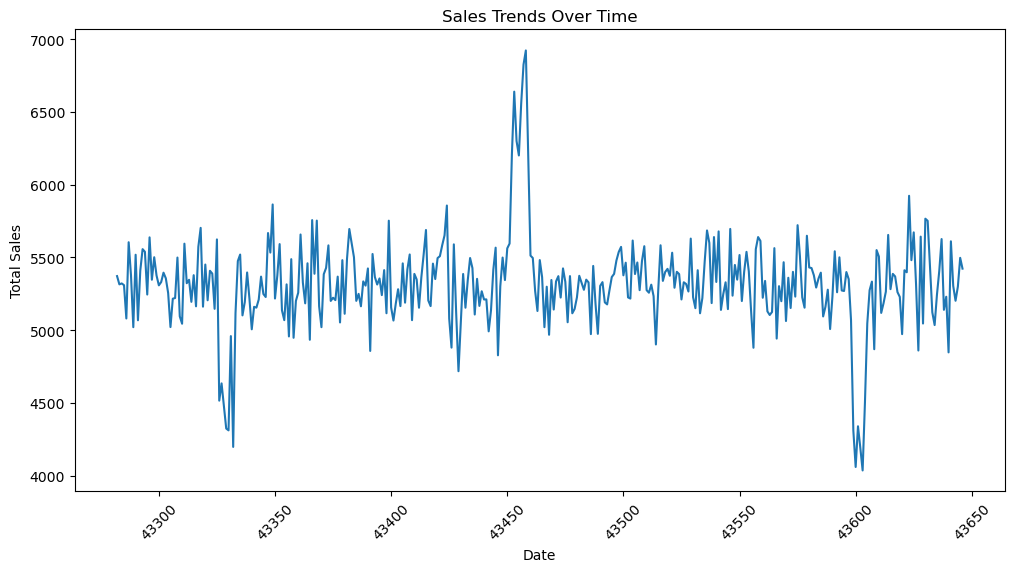

In [7]:
# Sales Trends Over Time
plt.figure(figsize=(12, 6))
merged_df.groupby('DATE')['TOT_SALES'].sum().plot()
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [17]:
top_products = (
    merged_df.groupby(["PROD_NBR", "PROD_NAME"]).agg({"TOT_SALES": "sum", "PROD_QTY": "sum"}).reset_index()
)
top_products["Rank_Score"] = top_products["TOT_SALES"] * 0.7 + top_products["PROD_QTY"] * 0.3
top_3_products = top_products.nlargest(3, "Rank_Score")
print("THE TOP 3 Products are\n\n",top_3_products)

THE TOP 3 Products are

     PROD_NBR                                 PROD_NAME  TOT_SALES  PROD_QTY  \
3          4          Dorito Corn Chp     Supreme 380g    40352.0      6509   
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6      6164   
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2      6106   

    Rank_Score  
3     30199.10  
13    27306.52  
15    26194.74  


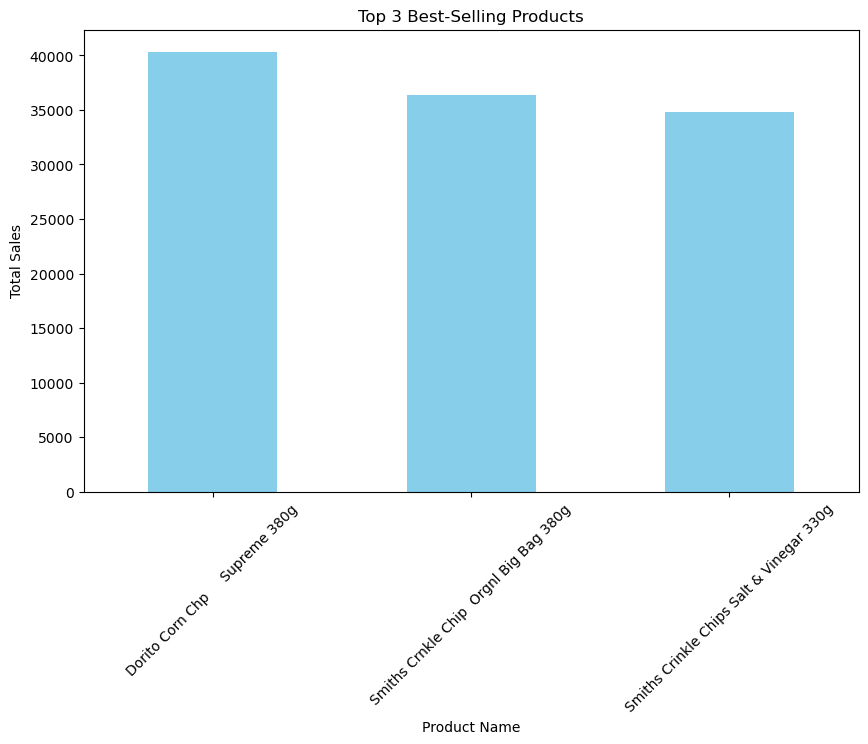

In [9]:
# Find Top 3 Best-Selling Products
plt.figure(figsize=(10, 6))
top_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(3)

# Plot
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 3 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [10]:
print(merged_df["PREMIUM_CUSTOMER"].value_counts().T)

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69691
Name: count, dtype: int64


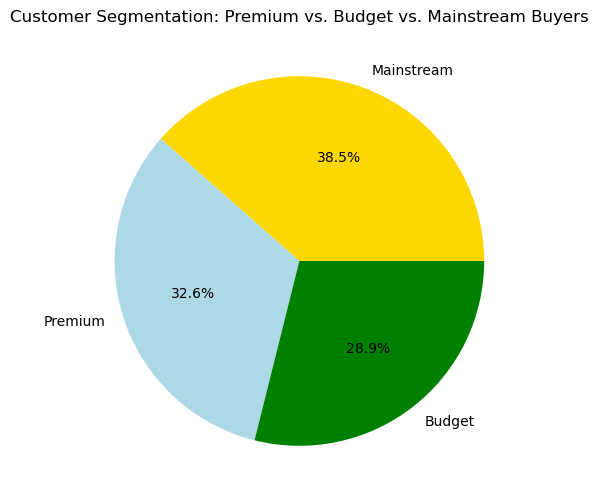

In [11]:
# Define the conditions
median_sales = merged_df['TOT_SALES'].median()
low_sales = merged_df['TOT_SALES'].quantile(0.33)
high_sales = merged_df['TOT_SALES'].quantile(0.67)

conditions = [
    merged_df['TOT_SALES'] > high_sales,  # Premium buyers
    merged_df['TOT_SALES'] < low_sales,   # Budget buyers
]

choices = ['Premium', 'Budget']

# Default to 'Mainstream' if neither condition is met
merged_df['Customer Segment'] = np.select(conditions, choices, default='Mainstream')

# Plot the pie chart
plt.figure(figsize=(6, 6))
merged_df['Customer Segment'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue', 'green']
)
plt.title("Customer Segmentation: Premium vs. Budget vs. Mainstream Buyers")
plt.ylabel("")
plt.show()

C:\Users\Chirag Rai\AppData\Local\Temp\ipykernel_5644\4132538734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="LIFESTAGE", palette="Blues_r")


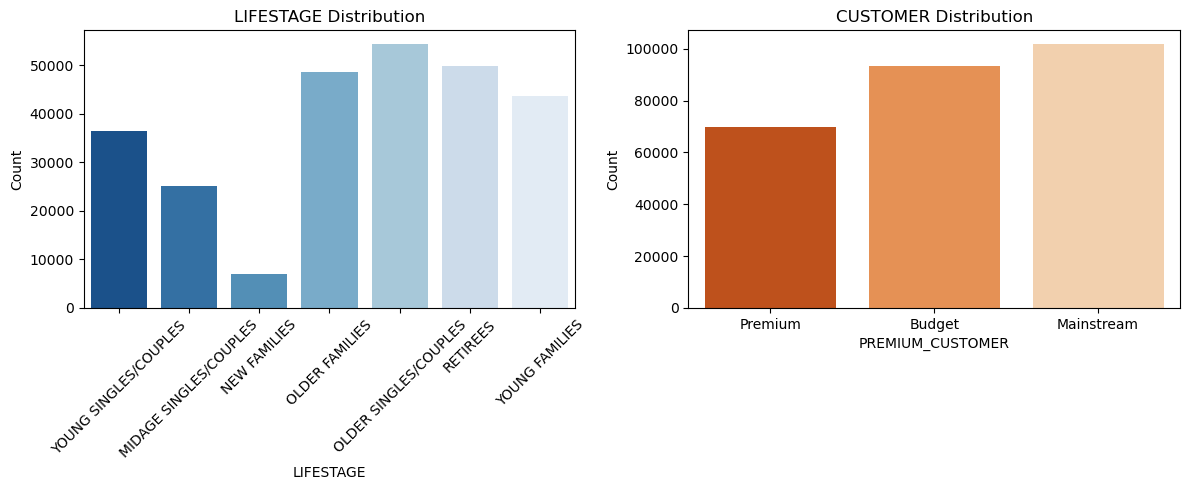

In [12]:
# Set up the figure
plt.figure(figsize=(12, 5))
# Subplot for LIFESTAGE Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=merged_df, x="LIFESTAGE", palette="Blues_r")
plt.title("LIFESTAGE Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
# Subplot for PREMIUM_CUSTOMER Distribution
plt.subplot(1, 2, 2)
sns.countplot(data=merged_df, x="PREMIUM_CUSTOMER", palette="Oranges_r",hue="PREMIUM_CUSTOMER")
plt.title("CUSTOMER Distribution")
plt.ylabel("Count")
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [13]:
loyal_customers = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TOT_SALES": "sum", "PROD_QTY": "sum"}).reset_index()
)
loyal_customers["Rank_Score"] = loyal_customers["TOT_SALES"] * 0.6 + loyal_customers["PROD_QTY"] * 0.4
top_loyal_customers = loyal_customers.nlargest(3, "Rank_Score")
loyal_customer_stats = (
    top_loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
)
most_loyal_segment = loyal_customer_stats.nlargest(1, "TOT_SALES")

print(most_loyal_segment,"\n\n\n")  # Display results
print(top_loyal_customers)

        LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0  OLDER FAMILIES           Budget  168363.25 



                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  PROD_QTY  Rank_Score
6          OLDER FAMILIES           Budget  168363.25     45065   119043.95
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60     38632   110025.76
13               RETIREES       Mainstream  155677.05     40518   109613.43
